##Data Process

1.   upload and make time series data frame
2.   show seasonality by aggregating by months
3.   decompose into trend and seasonality
4.   Aggregate by years for random stats with and without decomposition
5.   'stacked' time series but as percentage of total millions (each line is a sector of retail as a percentage)


*   provide graphs in report
*   report in pdf







In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/tweedell/DS5110-Project/main/Retail%20Econ%20Data.csv' 

names = ['Furniture', 'Electronics', 'Building Material and Equip',
                             'Food and Beverage', 'Health and Personal Care', 'Clothing', 
                             'Hobby', 'General Merch', 'Misc', 'NonStore', 'Food Services', 
                             'Motor Vehicles']

data = pd.read_csv(url, index_col = 0, parse_dates = True, names = names, skiprows = 1)

data['Month'] = data.index.month

data.head()

,Furniture,Electronics,Building Material and Equip,Food and Beverage,Health and Personal Care,Clothing,Hobby,General Merch,Misc,NonStore,Food Services,Motor Vehicles,Month
1992-01-01,3846,3657,8964,29589,7258,6938,3023,14996,3642,6860,15693,29811,1
1992-02-01,3908,3490,9023,28570,7150,7524,2806,16015,3902,6059,15835,31217,2
1992-03-01,4157,3669,10608,29682,7413,8475,3040,17984,3755,6297,16848,35136,3
1992-04-01,4141,3527,11630,30228,7531,9401,3150,18872,4148,6022,16494,36082,4
1992-05-01,4275,3571,12327,31677,7488,9558,3175,20037,4600,5803,17648,36460,5


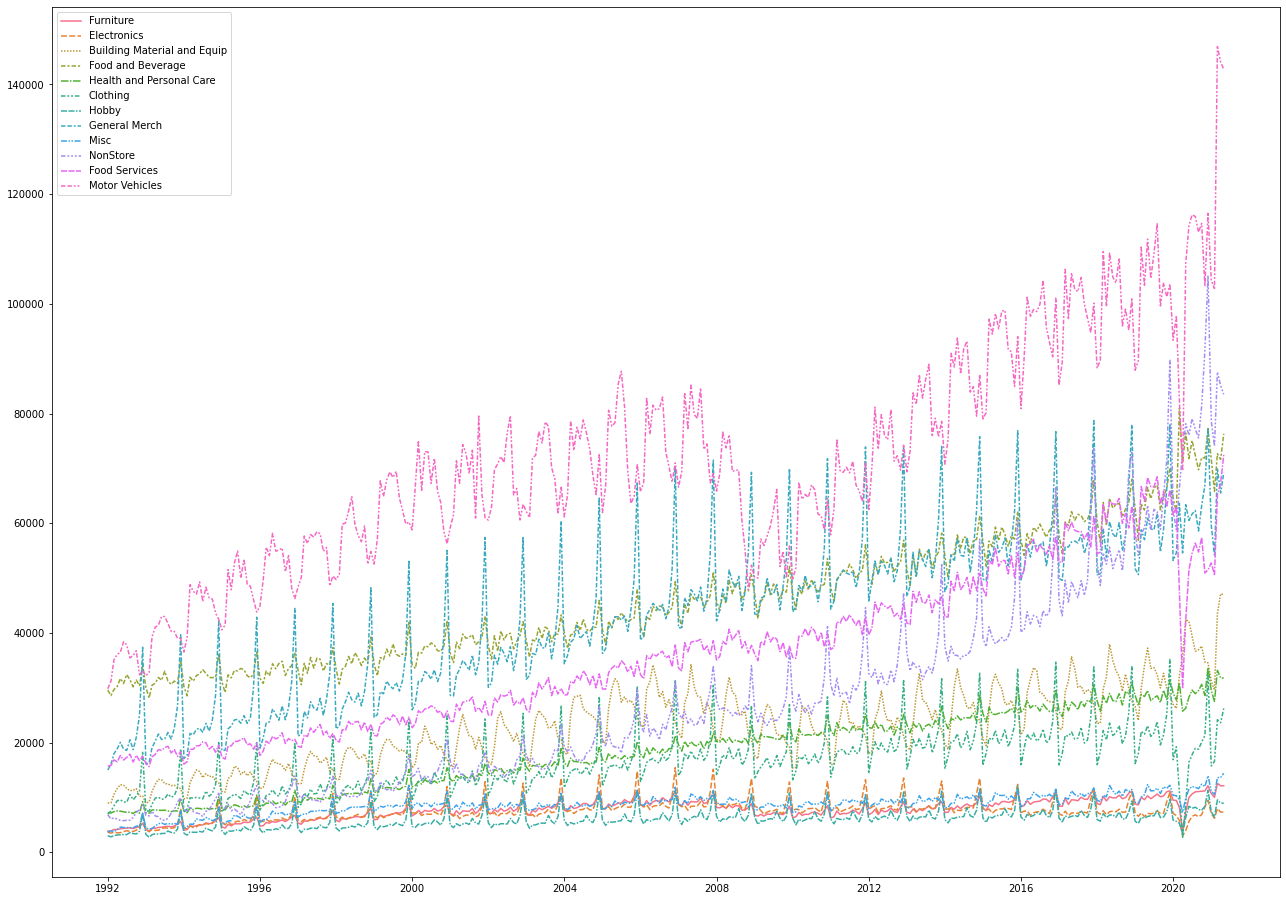

In [2]:
# get overall look at the time series
plt.figure(figsize = (22, 16))
sns.lineplot(data = data.iloc[:,:-1])

There are definitely trends and seasonality in the data. In addition, the 2008 US Recession shows it's effects on a few sectors. We may have to focus analysis on the past 5-10 years. 

In [3]:
# show seasonality *without* 2020-2021 since we think the pandemic changed stuff
data_red = data[data.index > "2010-12-31"]


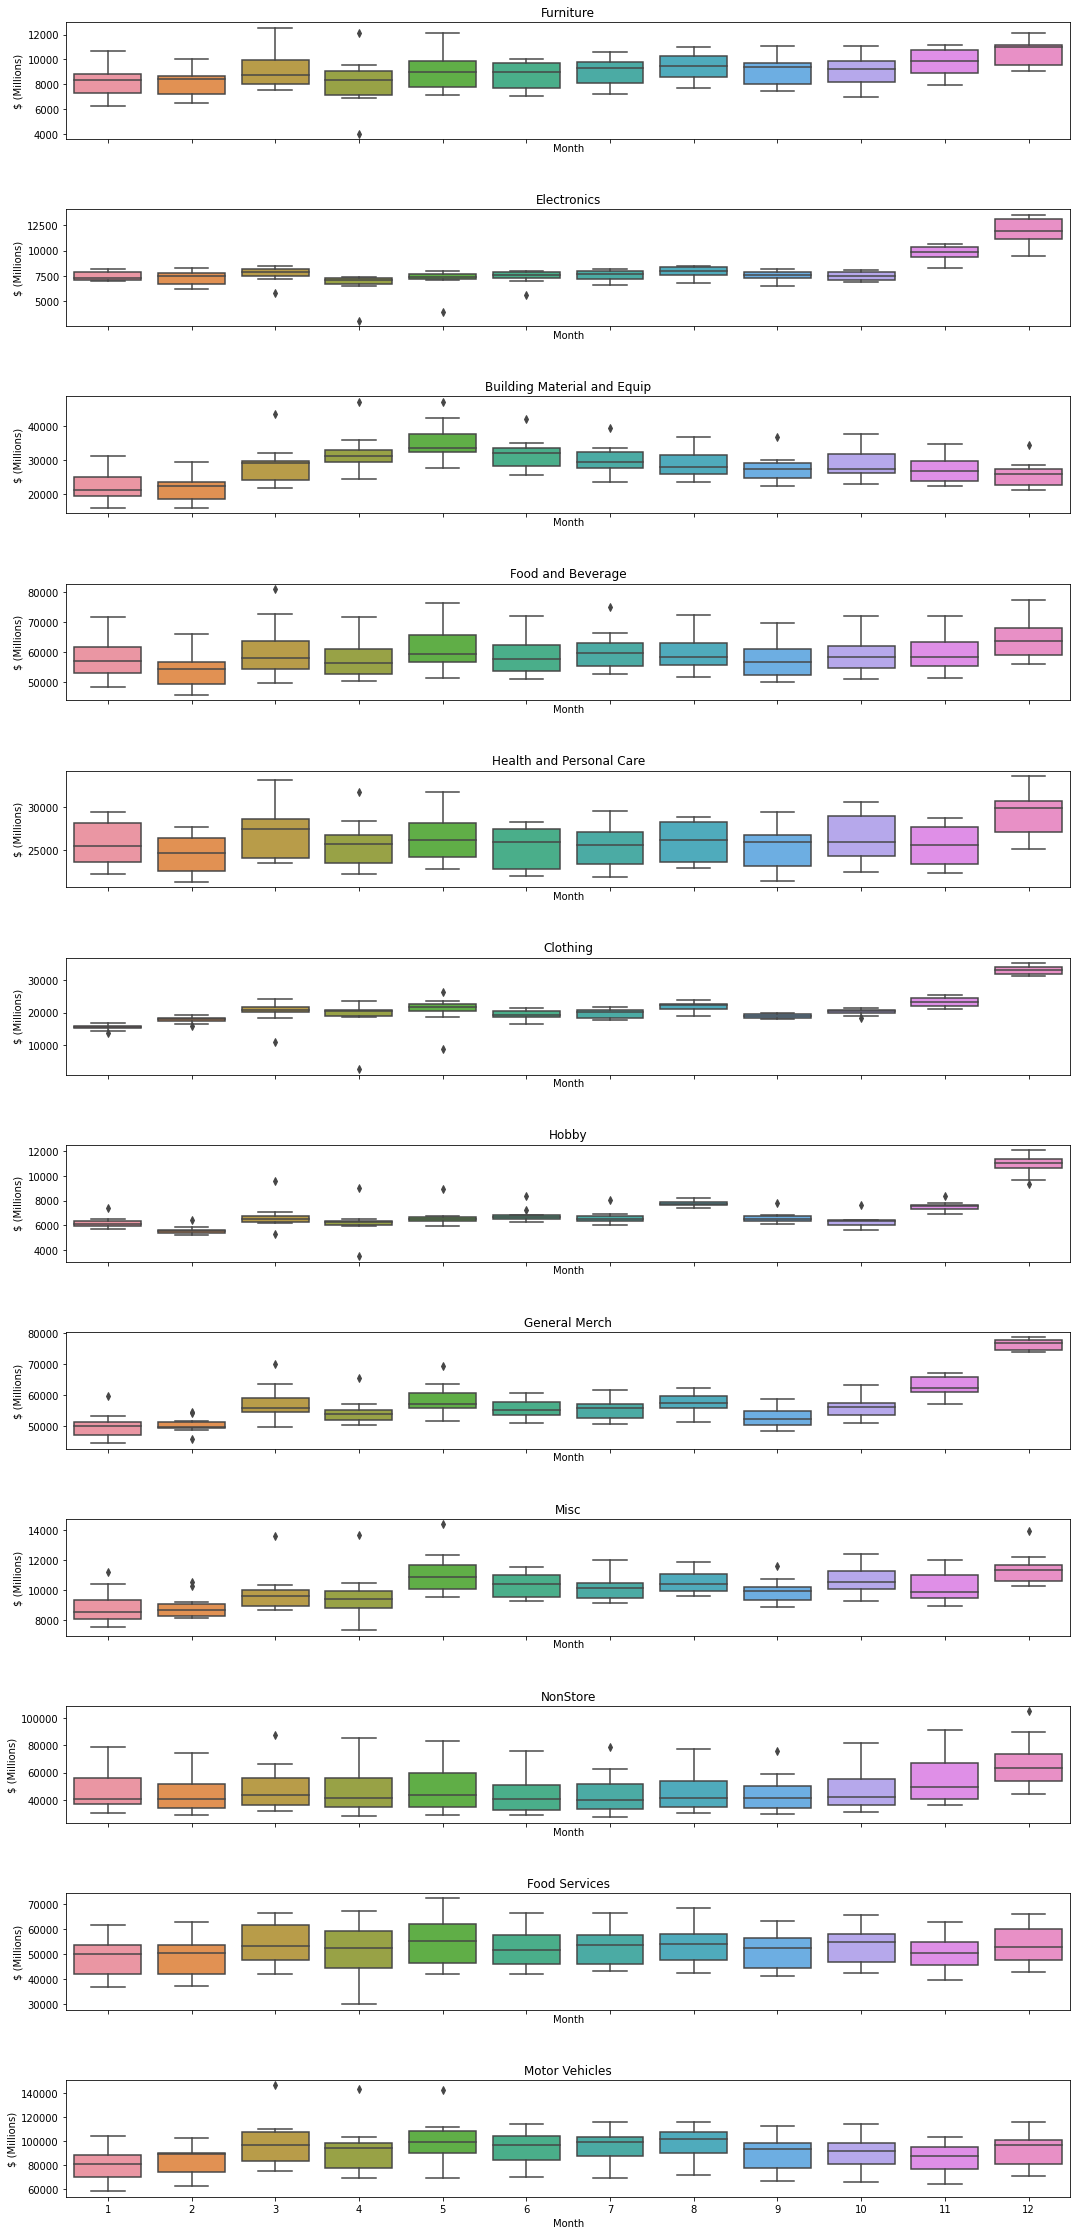

In [4]:
#sns.boxplot(data = pre2020, x = 'Month', y = 'Furniture')
fig, axes = plt.subplots(len(names), 1, figsize=(18, 40), sharex=True)
plt.subplots_adjust(hspace = 0.6)
for name, ax in zip(names, axes):
  sns.boxplot(data = data_red, x='Month', y=name, ax=ax)
  ax.set_ylabel('$ (Millions)')
  ax.set_title(name)

# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

Let's play with only one time series for now. Clothing

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


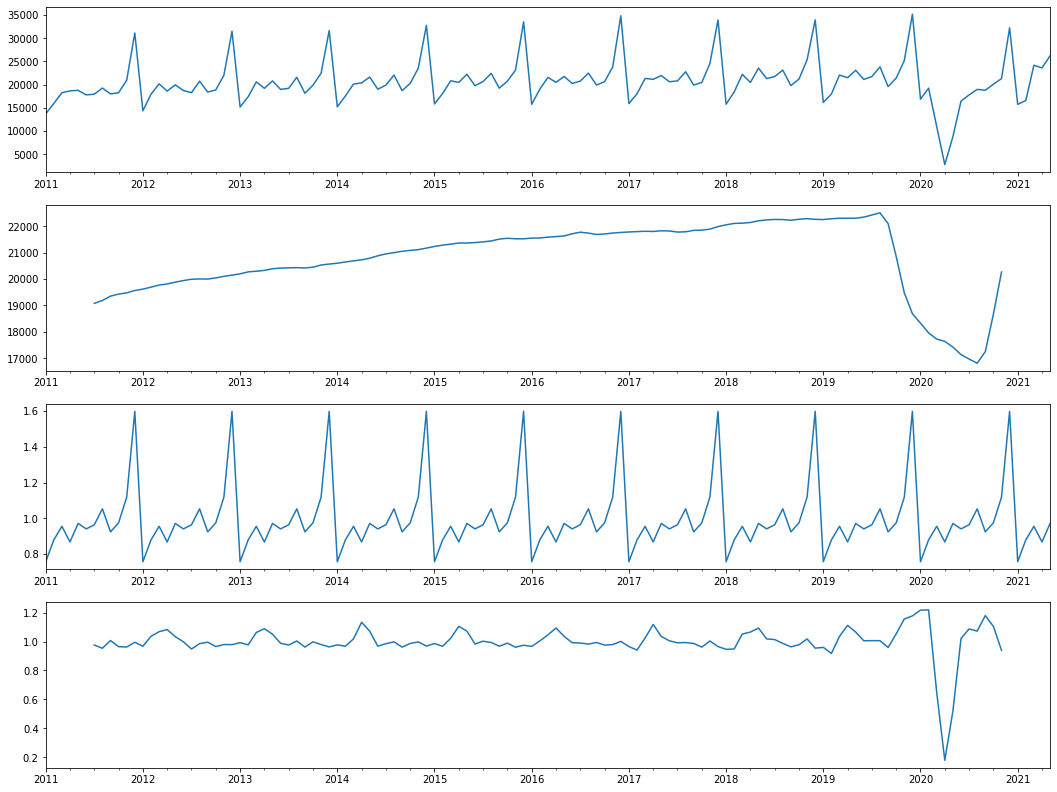

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

Clothing = data_red['Clothing'].copy()

res = seasonal_decompose(Clothing, model='multiplicative')
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(18,14))
res.observed.plot(ax=ax1)
res.trend.plot(ax=ax2)
res.seasonal.plot(ax=ax3)
res.resid.plot(ax=ax4)


The seasonal swings are increasing in proportion to the current value of the time series so a multiplicative decomposition is best. 

###Add a control signal to changepoint detect?

In [ ]:
#!pip install ruptures
#https://centre-borelli.github.io/ruptures-docs/
#C. Truong, L. Oudre, N. Vayatis. Selective review of offline change point detection methods. Signal Processing, 167:107299, 2020.

import ruptures as rpt
import numpy as np

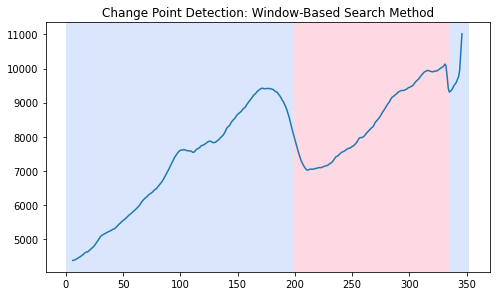

Furniture [200, 335, 353]


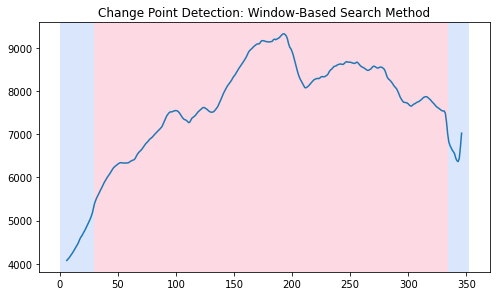

Electronics [30, 335, 353]


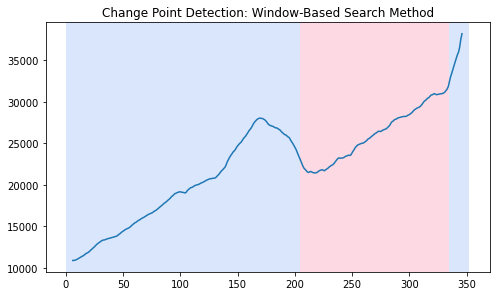

Building Material and Equip [205, 335, 353]


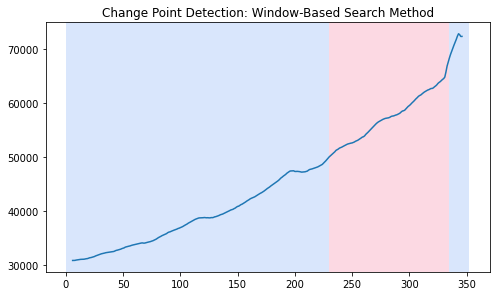

Food and Beverage [230, 335, 353]


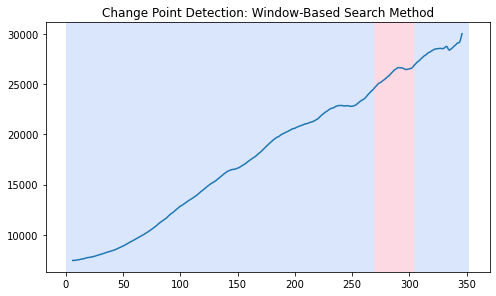

Health and Personal Care [270, 305, 353]


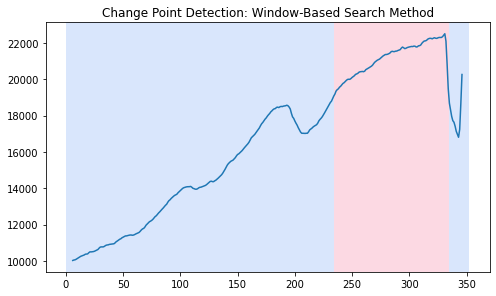

Clothing [235, 335, 353]


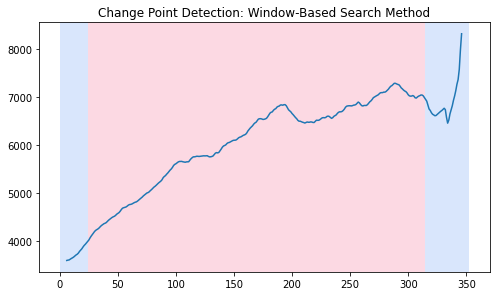

Hobby [25, 315, 353]


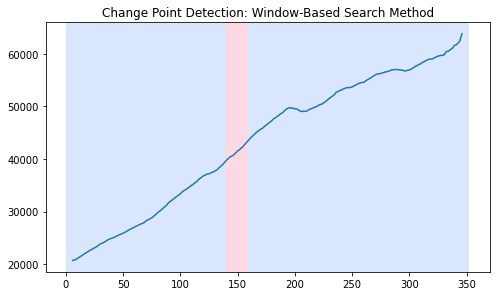

General Merch [140, 160, 353]


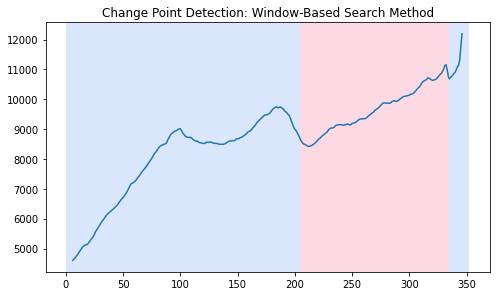

Misc [205, 335, 353]


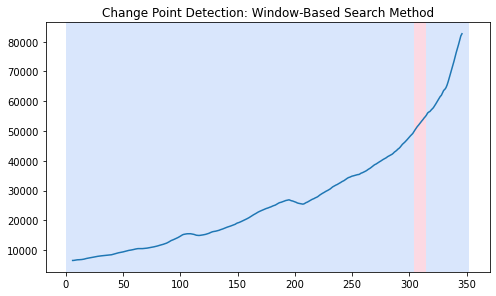

NonStore [305, 315, 353]


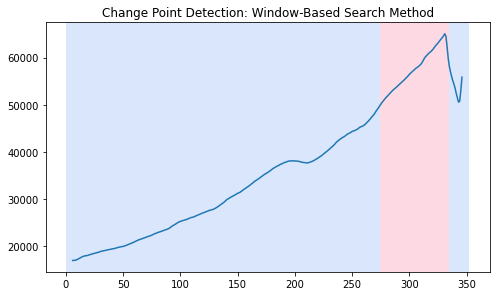

Food Services [275, 335, 353]


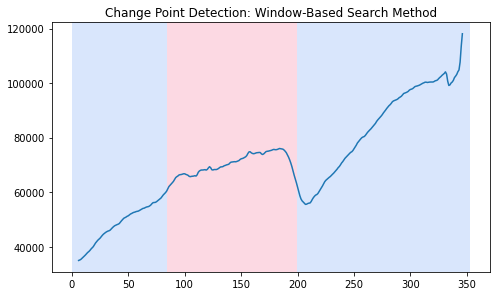

Motor Vehicles [85, 200, 353]


In [17]:
# for loop for plotting change point detection
for x in names:
  sector = data[x].copy()
  decomp_res = seasonal_decompose(sector, model='multiplicative') 
  decomp_array = np.array(decomp_res.trend)
  algo = rpt.Window(width=6, model='l2').fit(decomp_array) # 12 month window so seasonality might be addressed
  results = algo.predict(n_bkps=2)
  rpt.show.display(decomp_array, results, figsize=(7, 4))
  plt.title('Change Point Detection: Window-Based Search Method')
  plt.show()
  print(x, results)

In [13]:
# for loop for extracting change point results
for x in names:
  sector = data_red[x].copy()
  decomp_res = seasonal_decompose(sector, model='multiplicative') 
  decomp_array = np.array(decomp_res.trend)
  algo = rpt.Window(width=12, model='l2').fit(decomp_array) # 12 month window so seasonality might be addressed
  results = algo.predict(n_bkps=2)
  print(x, results)

Furniture [50, 105, 125]
Electronics [65, 105, 125]
Building Material and Equip [25, 85, 125]
Food and Beverage [40, 105, 125]
Health and Personal Care [40, 80, 125]
Clothing [40, 105, 125]
Hobby [40, 90, 125]
General Merch [40, 80, 125]
Misc [80, 100, 125]
NonStore [40, 80, 125]
Food Services [45, 85, 125]
Motor Vehicles [25, 50, 125]
